In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [2]:
df=pd.read_json(r"C:\Users\NSHAT\crossrealms - intern\Task 2 - cowire\cowrie.json",lines= True)

In [3]:
df.head()

,eventid,src_ip,src_port,dst_ip,dst_port,session,protocol,message,sensor,timestamp,...,ttylog,size,shasum,duplicate,outfile,destfile,filename,fingerprint,key,type
0,cowrie.session.connect,103.153.110.188,40812.0,172.23.0.2,22.0,16eb56763163,ssh,New connection: 103.153.110.188:40812 (172.23....,6954a43db87b,2025-07-11 03:50:13.264214+00:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,cowrie.client.version,103.153.110.188,NaN,NaN,NaN,16eb56763163,NaN,Remote SSH version: SSH-2.0-libssh_0.11.1,6954a43db87b,2025-07-11 03:50:13.265057+00:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,cowrie.client.kex,103.153.110.188,NaN,NaN,NaN,16eb56763163,NaN,SSH client hassh fingerprint: 03a80b21afa81068...,6954a43db87b,2025-07-11 03:50:13.524616+00:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,cowrie.login.failed,103.153.110.188,NaN,NaN,NaN,16eb56763163,NaN,login attempt [root/Senha123] failed,6954a43db87b,2025-07-11 03:50:14.609629+00:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,cowrie.session.closed,103.153.110.188,NaN,NaN,NaN,16eb56763163,NaN,Connection lost after 2.6 seconds,6954a43db87b,2025-07-11 03:50:15.871850+00:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.shape

(29726, 36)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29726 entries, 0 to 29725
Data columns (total 36 columns):
 #   Column           Non-Null Count  Dtype              
---  ------           --------------  -----              
 0   eventid          29726 non-null  object             
 1   src_ip           29726 non-null  object             
 2   src_port         4562 non-null   float64            
 3   dst_ip           4566 non-null   object             
 4   dst_port         4566 non-null   float64            
 5   session          29726 non-null  object             
 6   protocol         4558 non-null   object             
 7   message          29726 non-null  object             
 8   sensor           29726 non-null  object             
 9   timestamp        29726 non-null  datetime64[ns, UTC]
 10  version          4212 non-null   object             
 11  hassh            3988 non-null   object             
 12  hasshAlgorithms  3988 non-null   object             
 13  kexAlgs         

In [6]:
df.isnull().sum().sort_values(ascending=False)

key                29724
type               29724
fingerprint        29724
id                 29722
data               29722
filename           29715
destfile           29471
outfile            29460
ttylog             27163
size               27163
arch               27163
duplicate          26908
shasum             26897
input              26815
keyAlgs            25738
encCS              25738
hasshAlgorithms    25738
kexAlgs            25738
hassh              25738
langCS             25738
macCS              25738
compCS             25738
password           25627
username           25625
version            25514
protocol           25168
src_port           25164
dst_ip             25160
dst_port           25160
duration           22607
eventid                0
src_ip                 0
message                0
session                0
timestamp              0
sensor                 0
dtype: int64

In [7]:
df['protocol'].value_counts(dropna=False) # protocols used

protocol
NaN    25168
ssh     4558
Name: count, dtype: int64

In [8]:
df["eventid"].nunique()

15

In [9]:
df["eventid"].unique()

array(['cowrie.session.connect', 'cowrie.client.version',
       'cowrie.client.kex', 'cowrie.login.failed',
       'cowrie.session.closed', 'cowrie.login.success',
       'cowrie.direct-tcpip.request', 'cowrie.direct-tcpip.data',
       'cowrie.session.params', 'cowrie.command.input',
       'cowrie.log.closed', 'cowrie.command.failed',
       'cowrie.session.file_download', 'cowrie.session.file_upload',
       'cowrie.client.fingerprint'], dtype=object)

In [10]:
df['src_ip'].value_counts().head(10) 

src_ip
43.140.219.6       4310
47.243.227.167     1246
8.209.252.62       1245
47.115.220.32      1235
196.251.88.103     1177
120.26.87.185       973
141.98.212.72       499
115.21.183.150      490
107.150.112.242     490
91.240.15.18        490
Name: count, dtype: int64

In [11]:
df['message'].value_counts().head(10) # Most frequent messages

message
[]                                                                2563
Remote SSH version: SSH-2.0-Go                                    2198
SSH client hassh fingerprint: 0a07365cc01fa9fc82608ba4019af499    2017
Remote SSH version: SSH-2.0-libssh_0.11.1                         1838
SSH client hassh fingerprint: 03a80b21afa810682a776a7d42e5e6fb    1804
Connection lost after 120.0 seconds                                625
Connection lost after 2.2 seconds                                  485
Connection lost after 2.3 seconds                                  291
Connection lost after 2.5 seconds                                  226
Connection lost after 1.6 seconds                                  220
Name: count, dtype: int64

In [12]:
creds = df[df['username'].notnull()]
creds.groupby(['username', 'password']).size().sort_values(ascending=False).head(10) # Most frequently attempted username-password pairs.

username      password     
345gs5662d34  345gs5662d34     134
root          3245gs5662d34    100
              123456            16
              admin             15
              toor              12
git           git               12
uftp          uftp              11
hive          hive              10
oracle        oracle            10
mongo         123456            10
dtype: int64

<Axes: title={'center': 'Top 10 IPs by Event Count'}, xlabel='src_ip'>

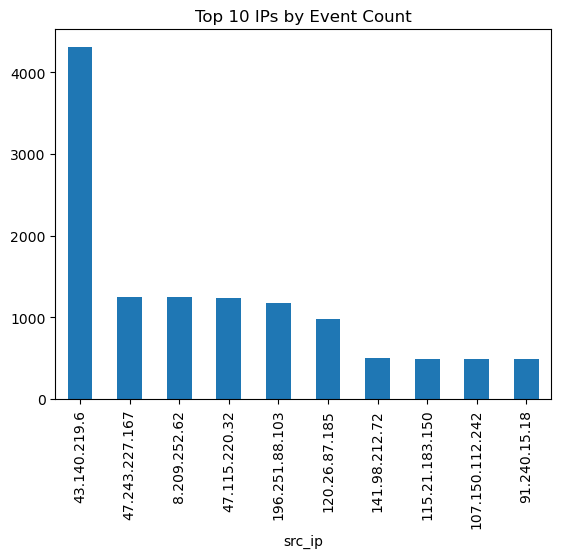

In [13]:
df['src_ip'].value_counts().head(10).plot(kind='bar', title='Top 10 IPs by Event Count')

In [14]:
df['behavior'] = 'unknown'
# from my pwn understanding , could be wrong
df.loc[df['message'].str.contains('login attempt', na=False), 'behavior'] = 'brute_force'
df.loc[df['input'].str.contains('wget|curl|tftp|http', na=False, case=False), 'behavior'] = 'malware_drop'
df.loc[(df['duration'] > 60) & df['input'].notnull(), 'behavior'] = 'interactive_session'
df.loc[(df['hassh'].notnull()) & df['input'].isnull(), 'behavior'] = 'ssh_fingerprint'

In [15]:
df['behavior'].value_counts()

behavior
unknown            21638
brute_force         4100
ssh_fingerprint     3988
Name: count, dtype: int64

In [16]:
start_time = df['timestamp'].min()
end_time = df['timestamp'].max()

print(f"Capture started at: {start_time}")
print(f"Capture ended at:   {end_time}")


Capture started at: 2025-07-11 03:50:13.264214+00:00
Capture ended at:   2025-07-11 16:43:22.924865+00:00


<Axes: title={'center': 'Events per Minute'}, xlabel='minute'>

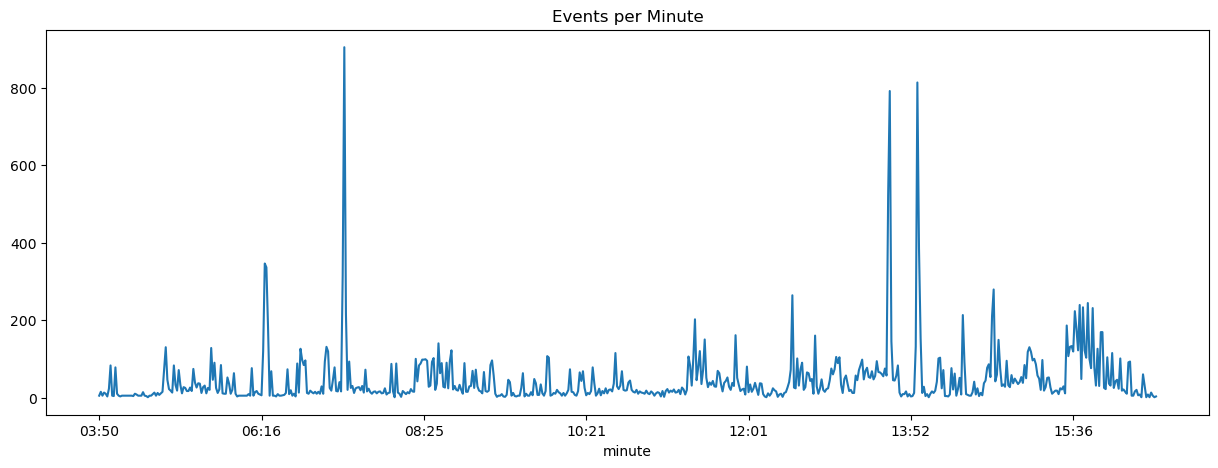

In [17]:
df['minute'] = df['timestamp'].dt.strftime('%H:%M')
df.groupby('minute').size().plot(kind='line', figsize=(15, 5), title='Events per Minute')

In [18]:
minute_counts = df.groupby('minute').size()

peak_minute = minute_counts.idxmax()
peak_value = minute_counts.max()

print(f"Peak activity: {peak_value} events at {peak_minute}")

Peak activity: 904 events at 07:36


In [19]:
df_peak = df[df['minute'] == peak_minute]

In [20]:
df_peak['src_ip'].value_counts()

src_ip
47.243.227.167    884
103.26.136.173      5
195.94.24.183       5
103.67.78.202       5
187.85.152.42       5
Name: count, dtype: int64

In [21]:
df_peak['message'].value_counts().head(30)

message
Remote SSH version: SSH-2.0-Go                                                  177
SSH client hassh fingerprint: 0a07365cc01fa9fc82608ba4019af499                  175
Connection lost after 2.1 seconds                                                50
Connection lost after 2.8 seconds                                                21
Connection lost after 2.4 seconds                                                20
Connection lost after 3.3 seconds                                                10
Connection lost after 3.0 seconds                                                 9
Connection lost after 2.7 seconds                                                 7
Connection lost after 2.6 seconds                                                 6
Connection lost after 3.5 seconds                                                 5
Connection lost after 2.3 seconds                                                 5
Connection lost after 3.2 seconds                                   

# Clustring based on TimeStamp

In [22]:
print(df['src_ip'].nunique())

124


In [23]:
# made features based on timestamp
df['hour'] = df['timestamp'].dt.hour
df['minute'] = df['timestamp'].dt.floor('min')

# we only haveone row per unique IP like this
df_time = df.groupby('src_ip').agg({
    'timestamp': ['min', 'max', 'count'],
    'hour': lambda x: x.mode()[0],  # Most active hour
}).reset_index()

df_time.columns = ['src_ip', 'first_seen', 'last_seen', 'total_events', 'most_active_hour'] # just renamee


# calc median duration per IP (ignores nulls automatically)
duration_median = df.groupby('src_ip')['duration'].median()

#  filled missing IP medians with overall median duration
overall_median = duration_median.median()
duration_median_filled = duration_median.fillna(overall_median)

#flag for IPs that have real duration data
duration_flag = duration_median.notna().astype(int)


df_time = df_time.set_index('src_ip')
df_time['median_duration'] = duration_median_filled
#df_time['has_duration_info'] = duration_flag
df_time.reset_index(inplace=True)

In [24]:
features = ['total_events', 'most_active_hour', 'median_duration']
X = df_time[features]

In [25]:
X = X.fillna(0)

In [26]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [27]:
kmeans = KMeans(n_clusters=3, random_state=42)
df_time['cluster'] = kmeans.fit_predict(X_scaled)

C:\Users\NSHAT\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [28]:
print("Cluster Centers (scaled features):")
print(kmeans.cluster_centers_)

Cluster Centers (scaled features):
[[-0.04863571 -0.01579307 -0.30758583]
 [ 9.11927151  1.07486669  0.13645297]
 [-0.33382471  0.06308697  3.11937813]]


In [29]:
print("Cluster summary (mean values per cluster):")
print(df_time.groupby('cluster')[features].mean().round(2))

Cluster summary (mean values per cluster):
         total_events  most_active_hour  median_duration
cluster                                                 
0              218.02              9.98             2.87
1             4310.00             14.00            17.10
2               90.73             10.27           112.70


In [30]:
print("Number of IPs per cluster:")
print(df_time['cluster'].value_counts())

Number of IPs per cluster:
cluster
0    112
2     11
1      1
Name: count, dtype: int64


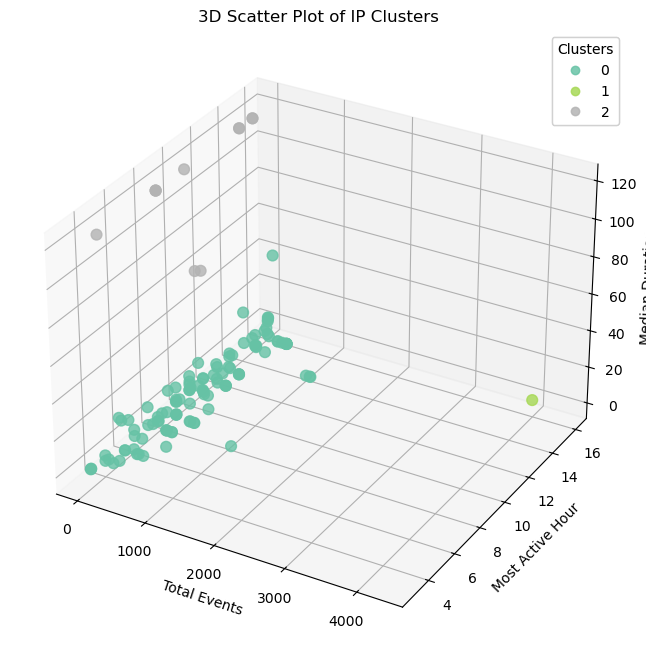

In [31]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(9, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(
    df_time['total_events'], 
    df_time['most_active_hour'], 
    df_time['median_duration'],
    c=df_time['cluster'], 
    cmap='Set2', 
    s=60, 
    alpha=0.8
)

ax.set_xlabel('Total Events')
ax.set_ylabel('Most Active Hour')
ax.set_zlabel('Median Duration') 
ax.set_title('3D Scatter Plot of IP Clusters')
 
# legend 
legend1 = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend1)

plt.show()

In [32]:
print(silhouette_score(X_scaled, df_time['cluster']))

0.6141664973807281


In [35]:
ip_counts = df['src_ip'].value_counts()

total =len(df)
ip_freq = ip_counts / total

print(ip_freq.head(12))

src_ip
43.140.219.6       0.144991
47.243.227.167     0.041916
8.209.252.62       0.041883
47.115.220.32      0.041546
196.251.88.103     0.039595
120.26.87.185      0.032732
141.98.212.72      0.016787
115.21.183.150     0.016484
107.150.112.242    0.016484
91.240.15.18       0.016484
103.172.205.172    0.016484
49.247.134.238     0.016484
Name: count, dtype: float64
